#The Project is about Natural Language Processing , It takes in The Title of the news and Text of the news and predicts if the news is fake or not

In [ ]:
# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [3]:
from nltk.corpus import stopwords

In [ ]:
# reading the csv files

In [4]:
df1=pd.read_csv('Fake.csv')
df2=pd.read_csv('True.csv')

In [5]:
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# df1 contains all the fake news thus creating a new column

In [6]:
df1['True']=0

In [7]:
df1.head()

,title,text,subject,date,True
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# df2 contains all the real news thus creating a new column

In [8]:
df2['True']=1

In [ ]:
# concating both the dataframes and creating a new one named news

In [9]:
news = pd.concat([df1,df2])

In [ ]:
# Analysing the news dataframe

In [10]:
news.head()

,title,text,subject,date,True
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
news.tail()

,title,text,subject,date,True
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
# creating two new columns to measure the length of the news and its title

In [12]:
news['Text_Length']=news['text'].apply(len)
news['Title_Length']=news['title'].apply(len)

In [ ]:
#Explotaory data Analysis

<AxesSubplot:xlabel='True', ylabel='Text_Length'>

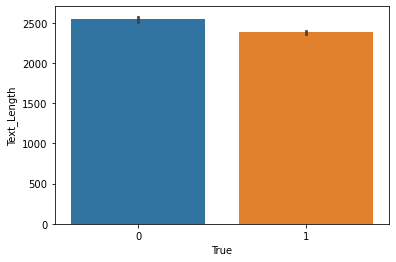

In [13]:
sns.barplot(y='Text_Length',x='True',data=news)

<AxesSubplot:xlabel='True', ylabel='Title_Length'>

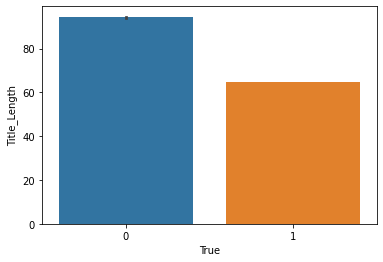

In [14]:
sns.barplot(y='Title_Length',x='True',data=news)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


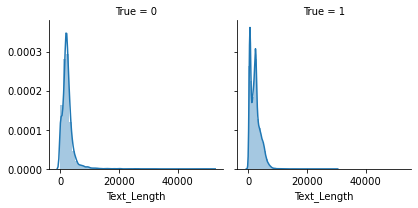

In [15]:
a=sns.FacetGrid(data=news,col='True')
a.map(sns.distplot,'Text_Length')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


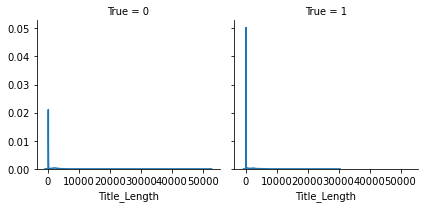

In [16]:
a.map(sns.distplot,'Title_Length')

In [17]:
news[news['Title_Length']==news['Title_Length'].max()]

,title,text,subject,date,True,Text_Length,Title_Length
15838,THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...,Hillary Clinton s supporters were calling cert...,politics,"Apr 12, 2015",0,207,286
17431,THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...,Hillary Clinton s supporters were calling cert...,Government News,"Apr 12, 2015",0,207,286
21868,THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...,Hillary Clinton s supporters were calling cert...,left-news,"Apr 12, 2015",0,207,286


In [18]:
news[news['Text_Length']==news['Text_Length'].max()]

,title,text,subject,date,True,Text_Length,Title_Length
22303,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,US_News,"December 28, 2016",0,51794,98
23086,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,Middle-east,"December 28, 2016",0,51794,98


In [19]:
news[['text','title','True']].groupby('True').describe()

text                                                                 \
      count unique                                                top freq   
True                                                                         
0     23481  17455                                                     626   
1     21417  21192  (Reuters) - Highlights for U.S. President Dona...    8   

      title                                                                 
      count unique                                                top freq  
True                                                                        
0     23481  17903  MEDIA IGNORES Time That Bill Clinton FIRED His...    6  
1     21417  20826  Factbox: Trump fills top jobs for his administ...   14

In [ ]:
# Cleaning the text for punctuation marks and commonly used words

In [20]:
import string

In [21]:
def text_process(mess):
    nopunc = [char for char in mess if mess not in string.punctuation]
    nopunc=''.join(nopunc)
    return [a for a in nopunc.split() if a.lower() not in stopwords.words('english')]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [23]:
from sklearn.pipeline import Pipeline 

In [24]:
model = Pipeline([
    ('vector',CountVectorizer(analyzer=text_process)),
    ('tfidi',TfidfTransformer()),
    ('q',MultinomialNB())
])

In [ ]:
# dividing the data into two parts 70% for training and 30% for testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=news['text']
y=news['True']
z=news['title']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
#Training the model for the text of the news

In [28]:
model.fit(x_train,y_train)

Pipeline(steps=[('vector',
                 CountVectorizer(analyzer=<function text_process at 0x0000025583044820>)),
                ('tfidi', TfidfTransformer()), ('q', MultinomialNB())])

In [ ]:
#Making predictions using the model for the text of the news

In [30]:
pred = model.predict(x_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#Checking the accuracy of the model

In [31]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.95      0.97      7073\n           1       0.95      0.99      0.97      6397\n\n    accuracy                           0.97     13470\n   macro avg       0.97      0.97      0.97     13470\nweighted avg       0.97      0.97      0.97     13470\n'

In [ ]:
#the model has a precesion , recall and accuracy of 97%
#and out of 13470 entries , 13083 were correct

In [32]:
confusion_matrix(y_test,pred)

array([[6744,  329],
       [  58, 6339]], dtype=int64)

In [33]:
modeltitle = Pipeline([
    ('vector',CountVectorizer(analyzer=text_process)),
    ('tfidi',TfidfTransformer()),
    ('q',MultinomialNB())
])

In [34]:
z_train,z_test,y_train,y_test=train_test_split(z,y,test_size=0.3)

In [ ]:
#Training the model for Title of the News

In [35]:
modeltitle.fit(z_train,y_train)

Pipeline(steps=[('vector',
                 CountVectorizer(analyzer=<function text_process at 0x0000025583044820>)),
                ('tfidi', TfidfTransformer()), ('q', MultinomialNB())])

In [ ]:
#Making predictions on the basis of the model

In [36]:
predtitle = modeltitle.predict(z_test)

In [ ]:
#Checking the Accuracy of the model

In [37]:
classification_report(y_test,predtitle)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7053\n           1       1.00      1.00      1.00      6417\n\n    accuracy                           1.00     13470\n   macro avg       1.00      1.00      1.00     13470\nweighted avg       1.00      1.00      1.00     13470\n'

In [ ]:
#out of 13470 entries , 13435 were correct

In [38]:
confusion_matrix(y_test,predtitle)

array([[7028,   25],
       [  10, 6407]], dtype=int64)